In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')

<H3> EDA </H3>

In [4]:
data.shape

(29451, 12)

In [5]:
data.head() 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


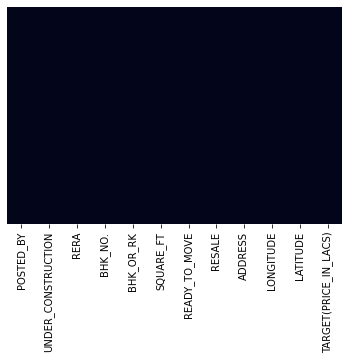

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [8]:
data.describe(include="all")

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451,29451.000000,29451.000000,29451.000000,29451,2.945100e+04,29451.000000,29451.000000,29451,29451.000000,29451.000000,29451.000000
unique,3,NaN,NaN,NaN,2,NaN,NaN,NaN,6899,NaN,NaN,NaN
top,Dealer,NaN,NaN,NaN,BHK,NaN,NaN,NaN,"Zirakpur,Chandigarh",NaN,NaN,NaN
freq,18291,NaN,NaN,NaN,29427,NaN,NaN,NaN,509,NaN,NaN,NaN
mean,NaN,0.179756,0.317918,2.392279,NaN,1.980217e+04,0.820244,0.929578,NaN,21.300255,76.837695,142.898746
std,NaN,0.383991,0.465675,0.879091,NaN,1.901335e+06,0.383991,0.255861,NaN,6.205306,10.557747,656.880713
min,NaN,0.000000,0.000000,1.000000,NaN,3.000000e+00,0.000000,0.000000,NaN,-37.713008,-121.761248,0.250000
25%,NaN,0.000000,0.000000,2.000000,NaN,9.000211e+02,1.000000,1.000000,NaN,18.452663,73.798100,38.000000
50%,NaN,0.000000,0.000000,2.000000,NaN,1.175057e+03,1.000000,1.000000,NaN,20.750000,77.324137,62.000000
75%,NaN,0.000000,1.000000,3.000000,NaN,1.550688e+03,1.000000,1.000000,NaN,26.900926,77.828740,100.000000


In [9]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [10]:
data.ADDRESS = data.ADDRESS.apply(lambda x: x.split(',')[-1]) 

In [11]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [12]:
data['POSTED_BY'] = LE.fit_transform(data['POSTED_BY'])
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,1,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,2,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,2,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,1,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5


In [13]:
data['BHK_OR_RK'] = LE.fit_transform(data['BHK_OR_RK'])
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,Kolkata,22.592200,88.484911,60.5


In [14]:
data['ADDRESS'] = LE.fit_transform(data['ADDRESS'])
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,21,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,160,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,21,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,78,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,134,22.592200,88.484911,60.5


In [15]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,21,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,160,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,21,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,78,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,134,22.592200,88.484911,60.5


In [16]:
data.shape

(29451, 12)

Checking for Duplicates

In [17]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 432


In [18]:
print('Before',data.shape)
data.drop_duplicates(inplace=True) 
print('After',data.shape)

Before (29451, 12)
After (29019, 12)


In [19]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [20]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29019 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29019 non-null  int64  
 1   UNDER_CONSTRUCTION     29019 non-null  int64  
 2   RERA                   29019 non-null  int64  
 3   BHK_NO.                29019 non-null  int64  
 4   BHK_OR_RK              29019 non-null  int64  
 5   SQUARE_FT              29019 non-null  float64
 6   READY_TO_MOVE          29019 non-null  int64  
 7   RESALE                 29019 non-null  int64  
 8   ADDRESS                29019 non-null  int64  
 9   LONGITUDE              29019 non-null  float64
 10  LATITUDE               29019 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29019 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 2.9 MB


checking outlier

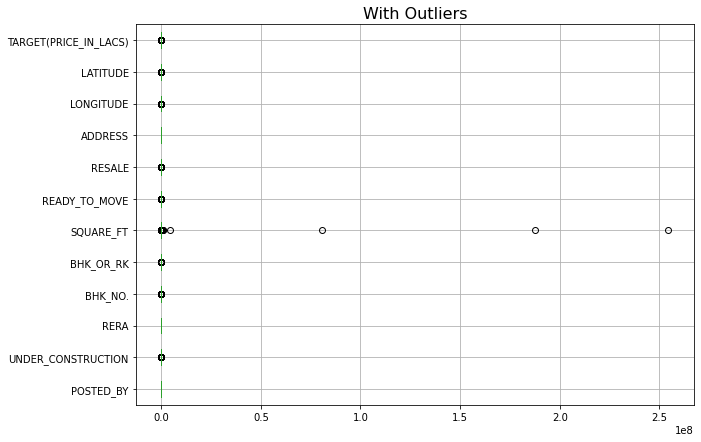

In [21]:
cont=data.dtypes[(data.dtypes!='uint8')].index 
plt.figure(figsize=(10,7))
data[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show() 

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in data[cont].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

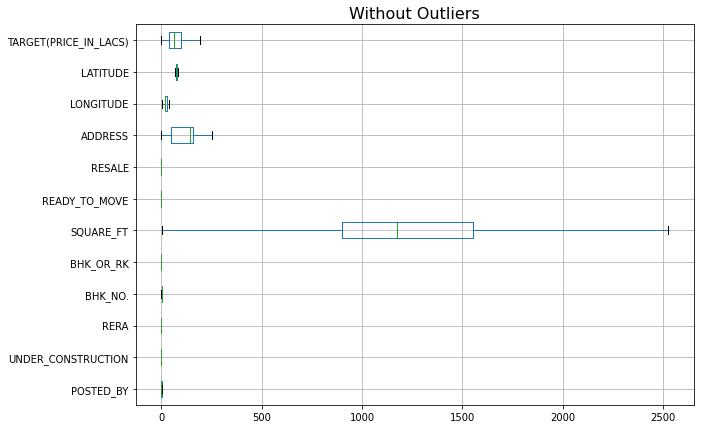

In [24]:
plt.figure(figsize=(10,7))
data[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show() 

Train Test Split

In [26]:
X = data.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = data[['TARGET(PRICE_IN_LACS)']] 

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
param_grid = {
    'max_depth': [10,12,15],
    'max_features': [6,8],
    'min_samples_leaf': [2,4],
    'min_samples_split': [20,40],
    'n_estimators': [150,200,250]
}
rf = RandomForestRegressor(random_state=1)
clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
clf.fit(X , y) 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [29]:
clf.best_params_

{'max_depth': 15,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 200}

In [30]:
best = clf.best_estimator_

In [31]:
ypred = best.predict(X) 

In [32]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y, ypred, squared=False) 

In [33]:
print(rmse)

18.62858336702891


In [34]:
testdata = pd.read_csv('/content/drive/MyDrive/test.csv')

In [35]:
testdata.shape

(68720, 11)

Handling Test Data

In [36]:
testdata.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [37]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


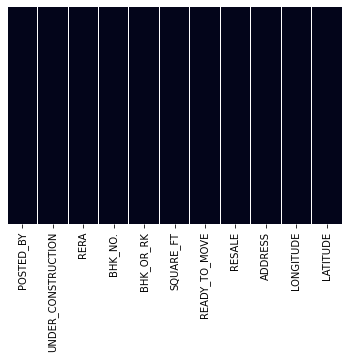

In [38]:
sns.heatmap(testdata.isnull(),yticklabels=False,cbar=False)

In [39]:
testdata.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [40]:
testdata.describe(include="all")

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
count,68720,68720.000000,68720.000000,68720.000000,68720,6.872000e+04,68720.000000,68720.000000,68720,68720.000000,68720.000000
unique,3,NaN,NaN,NaN,2,NaN,NaN,NaN,11048,NaN,NaN
top,Dealer,NaN,NaN,NaN,BHK,NaN,NaN,NaN,"Zirakpur,Chandigarh",NaN,NaN
freq,42437,NaN,NaN,NaN,68662,NaN,NaN,NaN,1051,NaN,NaN
mean,NaN,0.176557,0.316531,2.388198,NaN,2.762419e+03,0.823443,0.933498,NaN,21.288045,76.919388
std,NaN,0.381296,0.465126,0.864577,NaN,1.640991e+05,0.381296,0.249159,NaN,6.179034,10.100950
min,NaN,0.000000,0.000000,1.000000,NaN,1.000000e+00,0.000000,0.000000,NaN,-38.391261,-118.354100
25%,NaN,0.000000,0.000000,2.000000,NaN,9.000310e+02,1.000000,1.000000,NaN,18.452663,73.798100
50%,NaN,0.000000,0.000000,2.000000,NaN,1.174982e+03,1.000000,1.000000,NaN,20.933260,77.324966
75%,NaN,0.000000,1.000000,3.000000,NaN,1.550265e+03,1.000000,1.000000,NaN,26.888396,78.000723


In [41]:
testdata.ADDRESS = testdata.ADDRESS.apply(lambda x: x.split(',')[-1]) 

In [42]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [43]:
testdata['POSTED_BY'] = LE.fit_transform(testdata['POSTED_BY'])
testdata.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,1,BHK,545.171340,1,1,Surat,21.262000,73.047700
1,1,1,1,2,BHK,800.000000,0,0,Lalitpur,18.966114,73.148278
2,1,0,0,2,BHK,1257.096513,1,1,Kolkata,22.592200,88.484911
3,1,0,0,3,BHK,1400.329489,1,1,Jaipur,26.988300,75.584600
4,2,0,0,1,BHK,430.477830,1,1,Nadiad,22.700000,72.870000


In [44]:
testdata['BHK_OR_RK'] = LE.fit_transform(testdata['BHK_OR_RK'])
testdata.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,1,0,545.171340,1,1,Surat,21.262000,73.047700
1,1,1,1,2,0,800.000000,0,0,Lalitpur,18.966114,73.148278
2,1,0,0,2,0,1257.096513,1,1,Kolkata,22.592200,88.484911
3,1,0,0,3,0,1400.329489,1,1,Jaipur,26.988300,75.584600
4,2,0,0,1,0,430.477830,1,1,Nadiad,22.700000,72.870000


In [45]:
testdata['ADDRESS'] = LE.fit_transform(testdata['ADDRESS'])
testdata.head() 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,1,0,545.171340,1,1,264,21.262000,73.047700
1,1,1,1,2,0,800.000000,0,0,164,18.966114,73.148278
2,1,0,0,2,0,1257.096513,1,1,157,22.592200,88.484911
3,1,0,0,3,0,1400.329489,1,1,117,26.988300,75.584600
4,2,0,0,1,0,430.477830,1,1,187,22.700000,72.870000


In [46]:
testdata.shape

(68720, 11)

In [47]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  int64  
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  int64  
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  int64  
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 5.8 MB


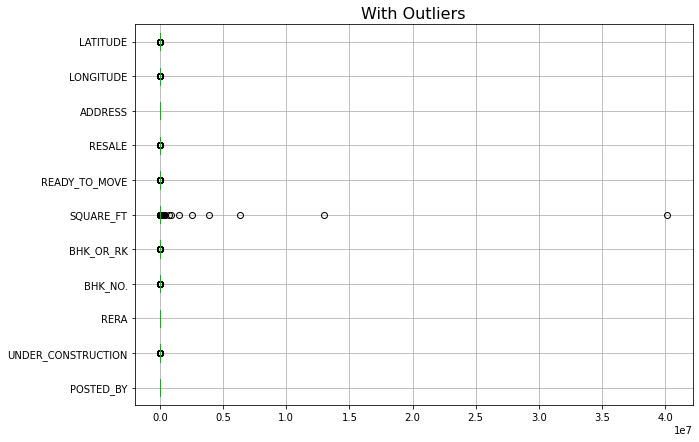

In [48]:
cont=testdata.dtypes[(testdata.dtypes!='uint8')].index 
plt.figure(figsize=(10,7))
testdata[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show() 

In [49]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [50]:
for column in testdata[cont].columns:
    lr,ur=remove_outlier(testdata[column])
    testdata[column]=np.where(testdata[column]>ur,ur,testdata[column])
    testdata[column]=np.where(testdata[column]<lr,lr,testdata[column])

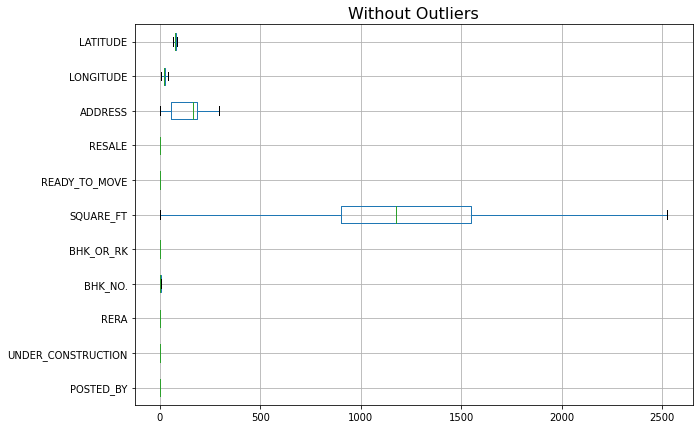

In [51]:
plt.figure(figsize=(10,7))
testdata[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show() 

In [52]:
ypred_test=best.predict(testdata)

In [53]:
print(ypred_test) 

[ 19.35726933  51.46335052 124.31257015 ... 162.02142897  60.7652589
 183.50517657]


In [54]:
testdata['TARGET(PRICE_IN_LACS)'] = ypred_test 

In [55]:
X1 = testdata.drop('TARGET(PRICE_IN_LACS)', axis=1)
y1= testdata[['TARGET(PRICE_IN_LACS)']] 

In [56]:
y1.to_csv('sample_submission.csv' , index=False)

In [57]:
print(y1) 

       TARGET(PRICE_IN_LACS)
0                  19.357269
1                  51.463351
2                 124.312570
3                  45.486034
4                  16.875063
...                      ...
68715              91.684253
68716             108.661823
68717             162.021429
68718              60.765259
68719             183.505177

[68720 rows x 1 columns]
